<a href="https://colab.research.google.com/github/Bright957/myback/blob/main/%E2%80%9CtableQA_ipynb%E2%80%9D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## tableQA

This is a tool for querying natural language on tabular data like csvs,excel sheet,etc. The QA system converts natural language to SQL queries and feeds the dataframe to a database,upon which the generated SQL query is applied to obtain results.

Some of the features of tableQA are:

- Supports detection from multiple csvs
- Support FuzzyString implementation. i.e, incomplete csv values in query can be automatically detected and filled in the query.
- Open-Domain, No training required.
- Add manual schema for customized experience
- Auto-generate schemas in case schema not provided

Built with the help of QA models of [huggingface transformers](https://huggingface.co/transformers/examples.html) .

In [1]:
! pip install nltk

In [3]:
! pip install tableqa

     |████████████████████████████████| 930 kB 4.2 MB/s 
     |████████████████████████████████| 107 kB 48.9 MB/s 
     |████████████████████████████████| 769 kB 43.5 MB/s 
     |████████████████████████████████| 251 kB 36.1 MB/s 
     |████████████████████████████████| 42 kB 697 kB/s 
     |████████████████████████████████| 179 kB 35.9 MB/s 
     |████████████████████████████████| 3.0 MB 21.4 MB/s 
     |████████████████████████████████| 1.2 MB 48.9 MB/s 
     |████████████████████████████████| 895 kB 53.1 MB/s 
     |████████████████████████████████| 179.8 MB 62 kB/s 
     |████████████████████████████████| 96 kB 2.7 MB/s 
     |████████████████████████████████| 78 kB 3.6 MB/s 
     |████████████████████████████████| 87 kB 3.7 MB/s 
     |████████████████████████████████| 12.7 MB 35.4 MB/s 
     |████████████████████████████████| 1.5 MB 42.2 MB/s 
     |████████████████████████████████| 749 kB 51.7 MB/s 
     |████████████████████████████████| 3.3 MB 29.8 MB/s 
     |████████████████

In [4]:
! git clone https://github.com/abhijithneilabraham/tableQA/
%cd tableQA/tableqa/

Cloning into 'tableQA'...
remote: Enumerating objects: 921, done.
remote: Counting objects: 100% (133/133), done.
remote: Compressing objects: 100% (105/105), done.
remote: Total 921 (delta 81), reused 54 (delta 26), pack-reused 788
Receiving objects: 100% (921/921), 28.84 MiB | 11.18 MiB/s, done.
Resolving deltas: 100% (529/529), done.
/content/tableQA/tableqa


In [14]:
import pandas as pd

df = pd.read_csv("cleaned_data/Cancer Death - Data.csv")  #在这个路径下找到表
# A first look at data
#df.head()

In [6]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.


True

In [7]:
from tableqa.agent import Agent

agent = Agent(df)

INFO:absl:Using /tmp/tfhub_modules to cache modules.
INFO:absl:Downloading TF-Hub Module 'https://tfhub.dev/google/universal-sentence-encoder/4'.
INFO:absl:Downloaded https://tfhub.dev/google/universal-sentence-encoder/4, Total size: 987.47MB
INFO:absl:Downloaded TF-Hub Module 'https://tfhub.dev/google/universal-sentence-encoder/4'.


Downloading:   0%|          | 0.00/443 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.34G [00:00<?, ?B/s]


If your task is similar to the task the model of the ckeckpoint was trained on, you can already use TFBertForQuestionAnswering for predictions without further training.


Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [8]:
import json
file=open('schema/Cancer Death - Data.json')
schema_file=json.load(file)
print(schema_file)

{'name': 'Cancer Death', 'columns': [{'name': 'Nationality', 'mapping': {'National': ['national', 'nationals', 'citizen', 'citizens', 'emarati', 'emaratis'], 'Expatriate': ['expatriate', 'foreigner', 'foreigners', 'immigrant', 'immgrants', 'foreign']}}, {'name': 'Gender', 'mapping': {'Male': ['male', 'males', 'man', 'men', 'boys'], 'Female': ['female', 'females', 'woman', 'women', 'girls']}}, {'name': 'Cancer site', 'keywords': ['type of cancer', 'cancer location']}, {'name': 'Death Count', 'keywords': ['died', 'death', 'dead'], 'summable': 'True'}]}


You can also input multiple csvs and schemas and detect the corresponding csv,by giving the absolute path to the directories of  csvs and their respective schemas as shown below. Using a schema is optional.

In [13]:
csv_path="/content/tableQA/tableqa/cleaned_data"
schema_path="/content/tableQA/tableqa/schema"

agent=Agent(csv_path,schema_path)


演示

In [ ]:
agent.get_query("how many deaths of age below 40 had stomach cancer?")

In [ ]:
agent.query_db("how many deaths of age below 40 had stomach cancer?")

问题1

In [ ]:
agent.query_db("How many males died of stomach cancer in 2013?")

In [ ]:
agent.get_query("How many males died of stomach cancer in 2013?")

In [ ]:
agent.query_db("How many deaths of male had stomach cancer in 2013?")

In [ ]:
agent.get_query("How many deaths of male had stomach cancer in 2013?")

对不同关键字可以产生相同sql语句

In [ ]:
agent.get_query("What are the types of cancers found in male in 2014?")

In [ ]:
agent.get_query("What are the types of cancers found in man in 2014?")

问题2

In [ ]:
agent.get_query("How many types of cancers were discovered in 2015?")

In [ ]:
agent.get_query("How many types of cancers beginning with the letter 'S' were discovered in 2015?")

In [ ]:
agent.query_db("How many types of cancers were discovered in 2015?")

In [ ]:
agent.query_db("How many types of cancers beginning with the letter 'S' were discovered in 2015?")

问题3

In [ ]:
agent.get_query("What the nationality of the oldest person who died of stomach cancer in 2014?")

支持的部分函数

In [ ]:
agent.get_query("Get me the average death count per year of stomach cancer deaths?")

In [ ]:
agent.query_db("Get me the average death count per year of stomach cancer deaths?")

In [ ]:
agent.get_query("Show the max death count per year of stomach cancer deaths")

In [ ]:
agent.query_db("Show the max death count per year of stomach cancer deaths")

In [ ]:
agent.get_query("Show the summary death count per year of stomach cancer deaths")

In [ ]:
agent.query_db("Show the summary death count per year of stomach cancer deaths")

Using a manual schema can improve the perfomance, i.e , you can give keywords related to the csv names or column names, which allows the user to have more control over the output. A schema format can be seen below:

In [ ]:
Schema Format:
{
    "name": DATABASE NAME,
    "keywords":[DATABASE KEYWORDS],
    "columns":
    [
        {
        "name": COLUMN 1 NAME,
        "mapping":{
            CATEGORY 1: [CATEGORY 1 KEYWORDS],
            CATEGORY 2: [CATEGORY 2 KEYWORDS]
        }

        },
        {
        "name": COLUMN 2 NAME,
        "keywords": [COLUMN 2 KEYWORDS]
        },
        {
        "name": "COLUMN 3 NAME",
        "keywords": [COLUMN 3 KEYWORDS],
        "summable":"True"
        }
    ]
}


-"Mappings" are for those columns whose values have only few distinct classes.i.e, Gender in the above cancer death data have only two distinct classes, Male and Female.

-Include only the column names which need to have manual "keywords" or "mappings".Rest will will be autogenerated.

-"summable" is included for Numeric Type columns whose values are already count representations. Eg. Death Count,Cases etc. consists values which already represent a count.

You can see the schema of cancer death data below.

Using a schema:

In [ ]:
agent = Agent(df,schema_file)

In [ ]:
agent.get_query("How many males died of stomach cancer in 2013?")

'SELECT SUM(death_count) FROM cancer_death WHERE cancer_site = "Stomach" AND gender = "Male" AND year = "2013" '

In [ ]:
agent.query_db("how many deaths of age below 40 had stomach cancer?")

[(27,)]

In [ ]:
agent.get_query("Which nationality has the oldest average age among people who died of stomach cancer?")

'SELECT MAX(nationality) FROM cancer_death WHERE cancer_site = "Stomach" '

[('Other Cancer',),
 ('Leukaemia',),
 ('Other Cancer',),
 ('Brain, nervous system',),
 ('Leukaemia',),
 ('Leukaemia',),
 ('Other Cancer',),
 ('Leukaemia',),
 ('Cervix uteri',),
 ('Other pharynx',),
 ('Other Cancer',),
 ('Stomach',),
 ('Colorectum',),
 ('Breast',),
 ('Stomach',),
 ('Ovary',),
 ('Kidney, renal pelvis and ureter',),
 ('Gallbladder and extrahepatic ducts',),
 ('Breast',),
 ('Trachea, bronchus and lung',),
 ('Stomach',),
 ('Ovary',),
 ('Melanoma of skin',),
 ('Colorectum',),
 ('Cervix uteri',),
 ('Breast',),
 ('Trachea, bronchus and lung',),
 ('Pancreas',),
 ('Lip, oral cavity',),
 ('Leukaemia',),
 ('Colorectum',),
 ('Cervix uteri',),
 ('Breast',),
 ('Pancreas',),
 ('Other Cancer',),
 ('Lymphoma',),
 ('Liver and intrahepatic bile ducts',),
 ('Leukaemia',),
 ('Colorectum',),
 ('Cervix uteri',),
 ('Breast',),
 ('Trachea, bronchus and lung',),
 ('Stomach',),
 ('Ovary',),
 ('Other Cancer',),
 ('Non-melanoma skin cancer',),
 ('Lymphoma',),
 ('Liver and intrahepatic bile ducts',)

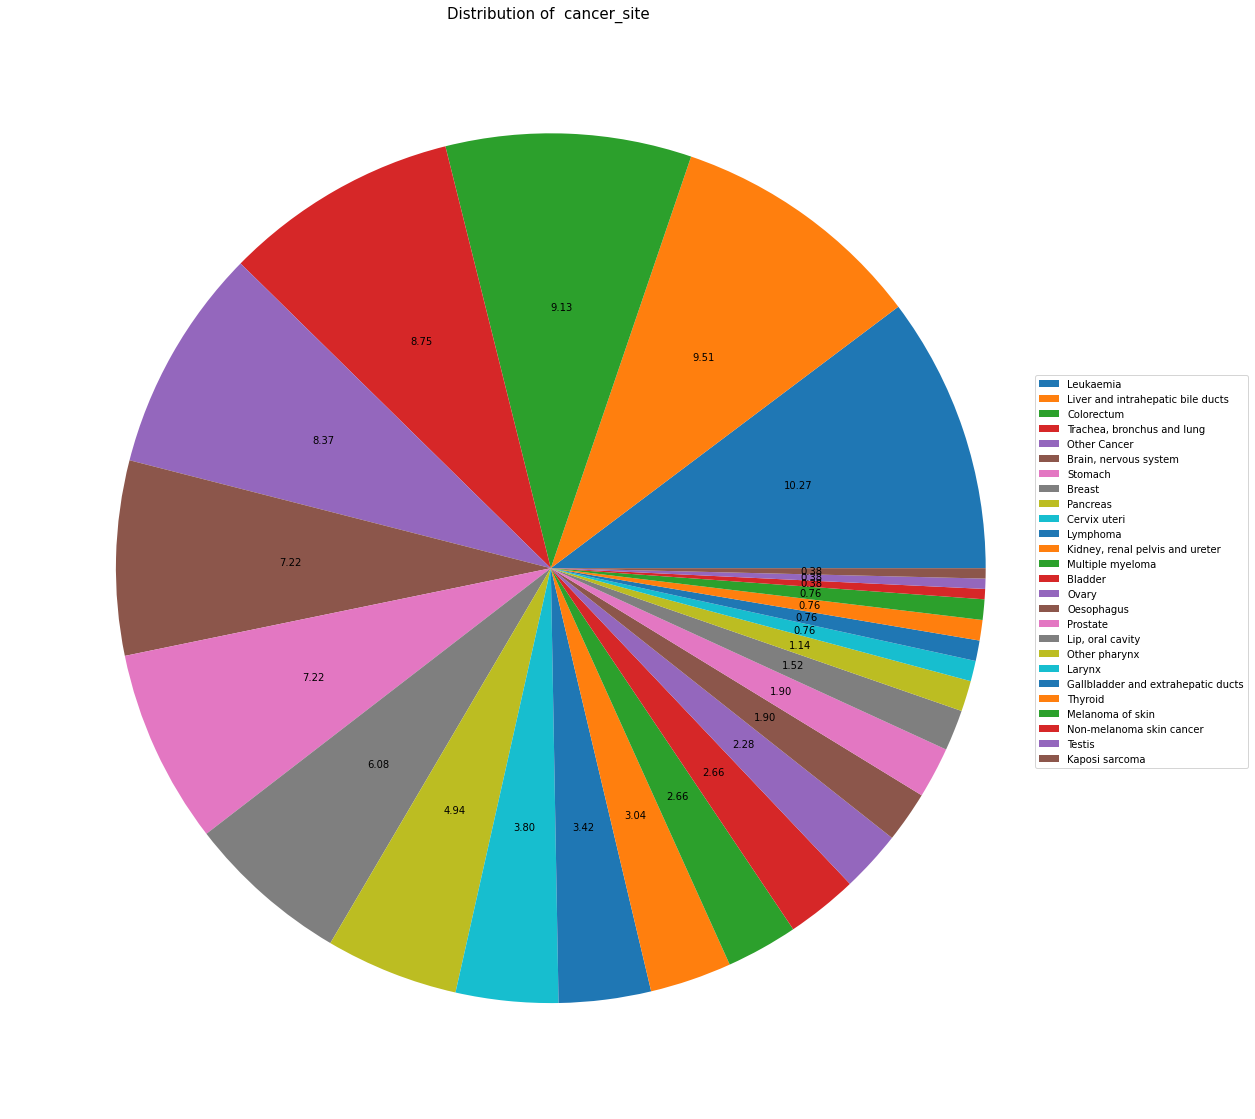

In [ ]:
agent.query_db("What are the types of cancers found in people in 2013?", chart ='pie', size=(20,20))

[('Leukaemia',),
 ('Leukaemia',),
 ('Leukaemia',),
 ('Trachea, bronchus and lung',),
 ('Other Cancer',),
 ('Leukaemia',),
 ('Lip, oral cavity',),
 ('Brain, nervous system',),
 ('Ovary',),
 ('Other Cancer',),
 ('Colorectum',),
 ('Breast',),
 ('Ovary',),
 ('Other pharynx',),
 ('Breast',),
 ('Trachea, bronchus and lung',),
 ('Other Cancer',),
 ('Melanoma of skin',),
 ('Leukaemia',),
 ('Breast',),
 ('Trachea, bronchus and lung',),
 ('Other Cancer',),
 ('Larynx',),
 ('Colorectum',),
 ('Cervix uteri',),
 ('Breast',),
 ('Stomach',),
 ('Pancreas',),
 ('Colorectum',),
 ('Breast',),
 ('Brain, nervous system',),
 ('Thyroid',),
 ('Pancreas',),
 ('Ovary',),
 ('Other Cancer',),
 ('Melanoma of skin',),
 ('Gallbladder and extrahepatic ducts',),
 ('Colorectum',),
 ('Breast',),
 ('Trachea, bronchus and lung',),
 ('Stomach',),
 ('Ovary',),
 ('Other Cancer',),
 ('Gallbladder and extrahepatic ducts',),
 ('Breast',),
 ('Brain, nervous system',),
 ('Trachea, bronchus and lung',),
 ('Pancreas',),
 ('Ovary',),

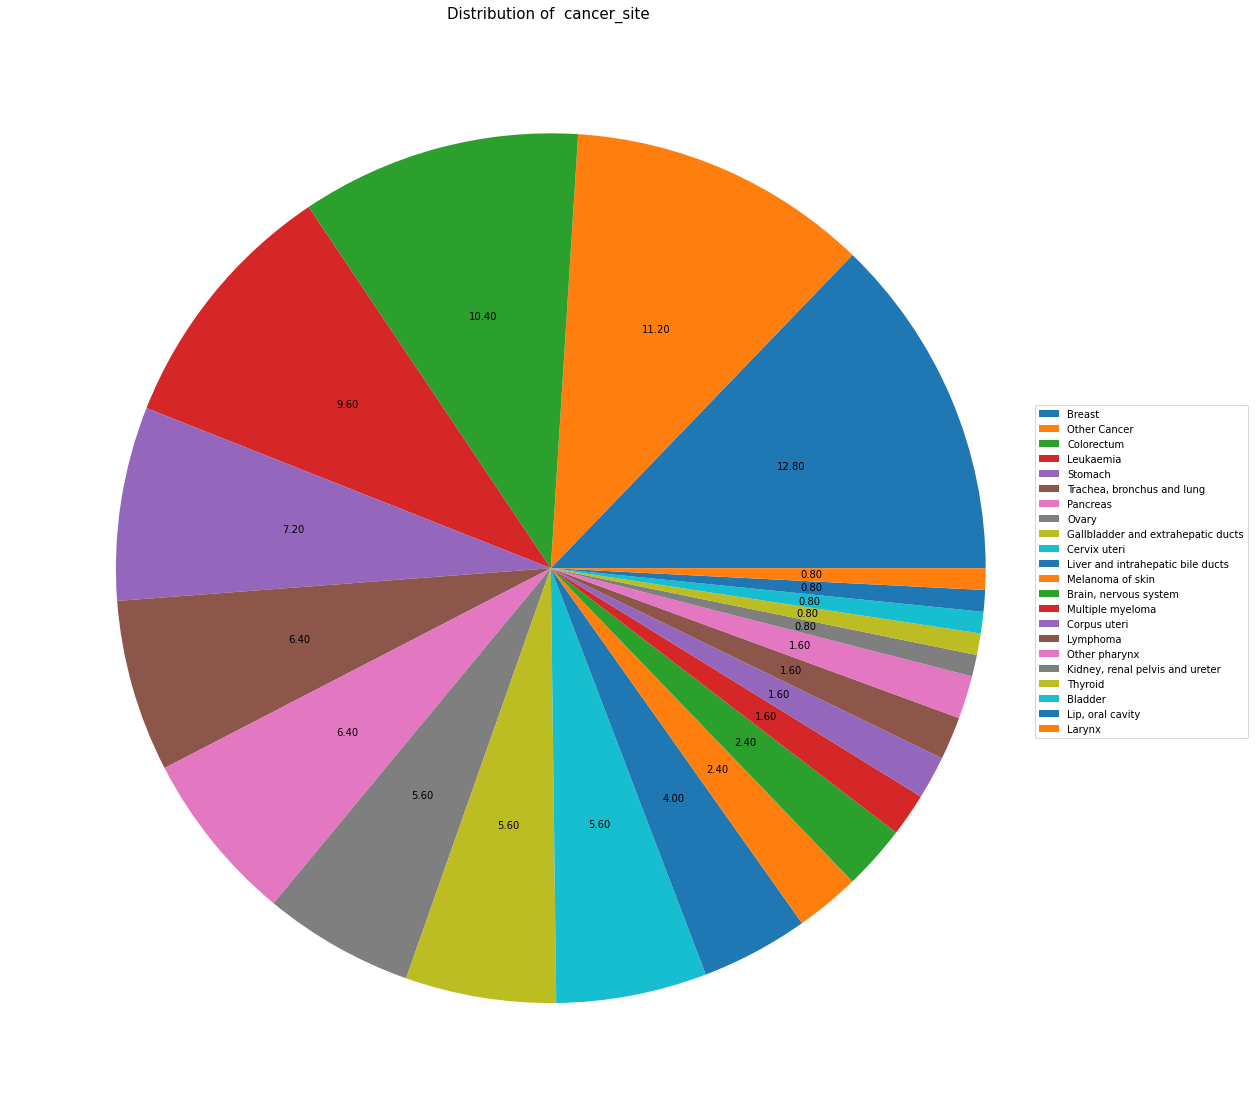

In [ ]:
agent.query_db("What are the types of cancers found in female in 2014?", chart ='pie', size=(20,20))